## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_df1 = pd.DataFrame(mouse_metadata, columns=["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
mouse_df2 = pd.DataFrame(study_results, columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"])

merge_df = pd.merge(mouse_df1, mouse_df2, on="Mouse ID")
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice.
drop_df['Mouse ID'].count()

NameError: name 'drop_df' is not defined

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use pd.df.duplicated to return boolean values, False if the id/timepoint combo isn't duplicated anywhere, True if it is
dup_df = merge_df[['Mouse ID', 'Timepoint']].duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

dup_df

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create dataframe with all mouse ids and the boolean list for duplicated timepoints
# pull out all mouse ids with duplicated timepoint values
# generate list of all unique ids with duplicated timepoints and print to see how many
# pull all data from original dataframe with offending mouse id 
merge_df_dup = pd.DataFrame({'Mouse ID': merge_df['Mouse ID'], 'Duplicated Time Point': dup_df})
remove_df = merge_df_dup.loc[merge_df_dup['Duplicated Time Point'] == True]
remove_id = remove_df['Mouse ID'].unique()
print(remove_id)
new_data = merge_df.loc[merge_df['Mouse ID'] == remove_id[0]]
new_data


['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[merge_df['Mouse ID'] != remove_id[0]]

In [16]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# call drug regimen and tumor volume columns from filtered data, that's all that's needed here
# use groupby objects with analysis functions to get analysis values for each regimen
#merge the dataframes, rename columns in the middle to prevent duplicate column names
# rename last column to fit
df2 = clean_df[['Drug Regimen', 'Tumor Volume (mm3)']]

df2_mean = df2.groupby(['Drug Regimen']).mean()
df2_median = df2.groupby(['Drug Regimen']).median()
df2_std = df2.groupby(['Drug Regimen']).std()
df2_sem = df2.groupby(['Drug Regimen']).sem()

df2_mm =pd.merge(df2_mean, df2_median, on='Drug Regimen')
df2_mm2 = pd.merge(df2_mm, df2_std, on='Drug Regimen')

df2_mm2 = df2_mm2.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume (mm3)',
                                      'Tumor Volume (mm3)_y': 'Median Tumor Volume (mm3)',
                                     'Tumor Volume (mm3)': 'Tumor Volume (mm3), STD'})

mouse_info = pd.merge(df2_mm2, df2_sem, on='Drug Regimen')
mouse_info = mouse_info.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3), SEM'})

mouse_info

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),"Tumor Volume (mm3), STD","Tumor Volume (mm3), SEM"
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_pd = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem']})

single_pd

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Timepoints'>

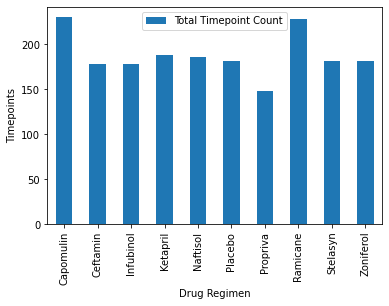

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# call drug regimen and timepoint columns for analysis
# Group timepoints by drug regimen and count how many there are for each
# rename column to make dataframe more representative and reset index column to make next step easier
# use pd.df.plot() to plot bar chart with proper title and axis labels. remove legend since it isn;t useful here
# tighten up chart layout so it looks nicer
bar_chart = clean_df[['Drug Regimen', 'Timepoint']]

timepoint_count = bar_chart.groupby(['Drug Regimen']).count()
timepoint_count = timepoint_count.rename(columns={'Timepoint': 'Total Timepoint Count'})
timepoint_count.reset_index(inplace=True)
timepoint_count.plot(x='Drug Regimen', y='Total Timepoint Count', kind='bar', 
                    ylabel='Timepoints')



Text(0, 0.5, 'Total Timepoints')

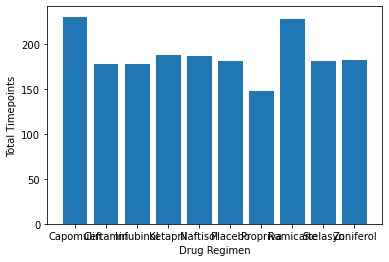

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# generate a new figure for the plot
# use pyplot to generate a bar chart
# adjust format, add title, and axis labels
# tighten up layout for aesthetics


plt.bar(timepoint_count['Drug Regimen'], timepoint_count['Total Timepoint Count'])
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')







<AxesSubplot:ylabel='Sex of each mouse'>

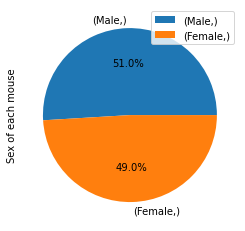

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# generate dataframe with sexes and counts for each sex
# plot using pandas plot function
sex_pie = clean_df[['Sex']]
sex_df = pd.DataFrame(sex_pie.value_counts())
sex_df.columns = ['Sex of each mouse']
sex_df.plot(kind='pie', y='Sex of each mouse', autopct='%1.1f%%') 
                 


([<matplotlib.patches.Wedge at 0x25d68495460>,
 [Text(-0.696335501700647, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.3798193645639892, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

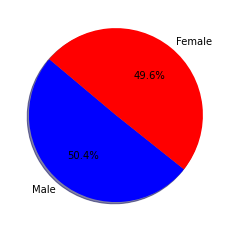

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
amount = [125, 123]
colors = ["Blue", "Red"]
plt.pie(amount, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

box_df = clean_df[['Mouse ID', 'Timepoint']]
time_df =box_df.groupby(['Mouse ID']).max()
results_df = pd.merge(clean_df, time_df, on=['Mouse ID', 'Timepoint'])
results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
meds = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

for val in indexval:
    if results_df['Drug Regimen'][val] == 'Capomulin':
        capomulin.append(results_df['Tumor Volume (mm3)'][val])
    if results_df['Drug Regimen'][val] == 'Ramicane':
        ramicane.append(results_df['Tumor Volume (mm3)'][val])
    if results_df['Drug Regimen'][val] == 'Infubinol':
        infubinol.append(results_df['Tumor Volume (mm3)'][val])
    if results_df['Drug Regimen'][val] == 'Ceftamin':
        ceftamin.append(results_df['Tumor Volume (mm3)'][val])    

q1 = [np.quantile(list, .25) for list in final_volume_list]
q2 = [np.quantile(list, .5) for list in final_volume_list]
q3 = [np.quantile(list, .75) for list in final_volume_list]
list_index = [0, 1, 2, 3]
iqr = [q3[index] - q1[index] for index in list_index]
lower = [q1[index] - (iqr_val[index] * 1.5) for index in list_index]
upper = [q3[index] + (iqr_val[index] * 1.5) for index in list_index]
finished_df = pd.DataFrame({'Drug Regimen': meds,
                                 'Lower Bound': lower,
                                   'Quartile 1': q1,
                                   'Median': q2,
                                   'Quartile 3': q3,
                                   'Upper Bound': upper,
                                   'IQR': iqr})
finished_df

,Drug Regimen,Lower Bound,Quartile 1,Median,Quartile 3,Upper Bound,IQR
0,Capomulin,20.704562,32.377357,38.125164,40.159220,51.832015,7.781863
1,Ramicane,17.912664,31.560470,36.561652,40.659006,54.306811,9.098537
2,Infubinol,36.832905,54.048608,60.165180,65.525743,82.741446,11.477135
3,Ceftamin,25.355450,48.722078,59.851956,64.299830,87.666458,15.577752


Text(0.5, 1.0, 'Ceftamin')

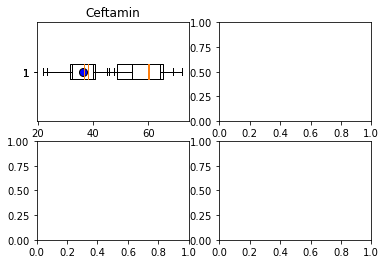

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(2,2)
axs[0,0].boxplot(capomulin, vert=False, flierprops={'markersize': 8, 'markerfacecolor': 'blue'})
axs[0,0].set_title('Capomulin'),
#
axs[0,0].boxplot(ramicane, vert=False, flierprops={'markersize': 8, 'markerfacecolor': 'blue'})
axs[0,0].set_title('Ramicane'),
#
axs[0,0].boxplot(infubinol, vert=False, flierprops={'markersize': 8, 'markerfacecolor': 'blue'})
axs[0,0].set_title('Infubinol'),
#
axs[0,0].boxplot(ceftamin, vert=False, flierprops={'markersize': 8, 'markerfacecolor': 'blue'})
axs[0,0].set_title('Ceftamin')


## Line and Scatter Plots

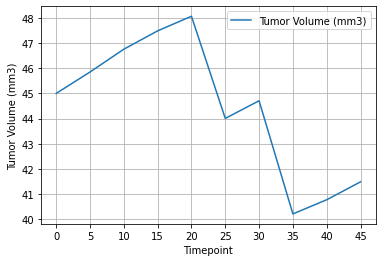

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
new_mousedata = clean_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

capo_info = new_mousedata.loc[new_mousedata['Drug Regimen'] == 'Capomulin']

capo_count = capo_info.groupby(['Mouse ID']).count()

capo_max = capo_count['Timepoint'].max()

max_only = capo_count.loc[capo_count['Timepoint']  == capo_max]

max_only.reset_index(inplace=True)

random_mouse = max_only['Mouse ID'][7]

random_df = capo_info.loc[capo_info['Mouse ID'] == random_mouse]

random_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', xticks = random_df['Timepoint'], 
                         ylabel='Tumor Volume (mm3)')
plt.grid()

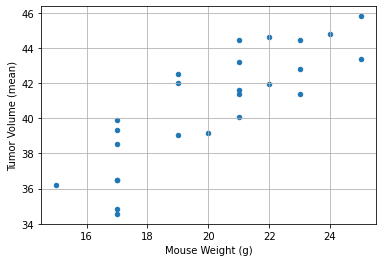

In [67]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# call mouse id, drug regimen, weight, and tumor volume columns from filtered_df
# filter for only mice on capomulin
# use groupby object to get mean tumor volume for each mouse
# reset index for easier referencing
# generate scatter plot with proper labels and format
tumor_df = clean_df[['Mouse ID', 'Drug Regimen','Weight (g)', 'Tumor Volume (mm3)']]

capo_tumor = tumor_df.loc[tumor_df['Drug Regimen'] == 'Capomulin']

mean_tumor = capo_tumor.groupby(['Mouse ID', 'Drug Regimen', 'Weight (g)']).mean()

mean_tumor.reset_index(inplace=True)

mean_tumor.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', xlabel='Mouse Weight (g)', ylabel='Tumor Volume (mean)')
plt.grid()

## Correlation and Regression

Text(15, 30, 'Correlation Coefficient, r = 0.84')

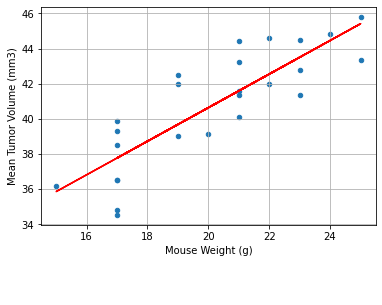

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# pull weight and tumor volume into individual lists to make regressions simpler
x_cor = mean_tumor['Weight (g)'].tolist()
y_cor = mean_tumor['Tumor Volume (mm3)'].tolist()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_cor, y_cor)

line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = f"Correlation Coefficient, r = {str(round(rvalue, 2))}"

regressions = [values * slope + intercept for values in x_cor]

mean_tumor.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', xlabel='Mouse Weight (g)', ylabel='Mean Tumor Volume (mm3)')
plt.grid()
plt.plot(x_cor, regressions, "r-")
plt.annotate(line,(15, 30),fontsize=12,color="red")
plt.annotate(correlation,(15, 30),fontsize=12,color="red")